# Masking and Social Distancing

This notebook is dedicated to robustness of universal features of epidemic models under social distancing guidelines.

## Setup

In [1]:
using DifferentialEquations, Plots, Plots.PlotMeasures, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

## Utility functions

In [2]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=8mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont = font(s-4, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts, td) = if (t-ts<0 || t-ts-td>0) 0 else 1 end

sinput (generic function with 1 method)

# Robustness to $\beta$

In [3]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts, td = p
    u = b - db.*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

function robustness(β)
    # change contact rates
    beta  = β
    bdiff = β/2
    gamma = β/6
    u0 = [1-1e-3, 1e-3, 0.]
    p  = [beta, bdiff, gamma, 0, 0]
    
    # ode solver
    alg = BS3()
    # solve the ode problem
    tspan = (0.0, 150)
    prob  = ODEProblem(SIR, u0, tspan, p)
    sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
    timen = sol.t[argmax(sol[2,:])] # time of the peak
    
    # range of the quarantine starting time and duration
    Trng = 0:Int(floor(50/β)) 
    trng = 0:Int(floor(15/β))
    data = zeros(size(Trng,1), size(trng,1))
    time = data
    
    for i = 1:size(Trng,1)
        for j = 1:size(trng,1)
            # solve the ode problem
            p[4:5] = [trng[j], Trng[i]]
            prob = ODEProblem(SIR, u0, tspan, p)
            sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
            data[i,j] = maximum(sol[2,:])
        end
    end
    
    p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
    p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, linewidth=6, legend=:false)
    p1 = bplot(p1, 16)
    savefig(p1, "figures/mask_"*string(β)*"_heatmap.svg")
    savefig(p1, "figures/mask_"*string(β)*"_heatmap.png")
    
    p2 = contour(trng, Trng, data,c=cgrad([:white, :blue]), colorbar = false,
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)", contour_labels = true, linewidth=1, 
    levels=range(round(minimum(data),digits=2), stop=round(maximum(data),digits=2),length=8))
    x = 0:Int(floor(10/β)); y = -2*x.+Int(floor(20/β))
    p2 = plot!(p2, x, y, linewidth=6, line=:dash, legend=:false)
    p2 = bplot(p2, 16)
    savefig(p2, "figures/mask_"*string(β)*"_contour.svg")
    savefig(p2, "figures/mask_"*string(β)*"_contour.png")
    
    fig = plot(p1, p2, layout=(1,2), size=(960,470))
    savefig(fig, "figures/mask_"*string(β)*".svg")
    savefig(fig, "figures/mask_"*string(β)*".png")
end

robustness (generic function with 1 method)

# Check different values

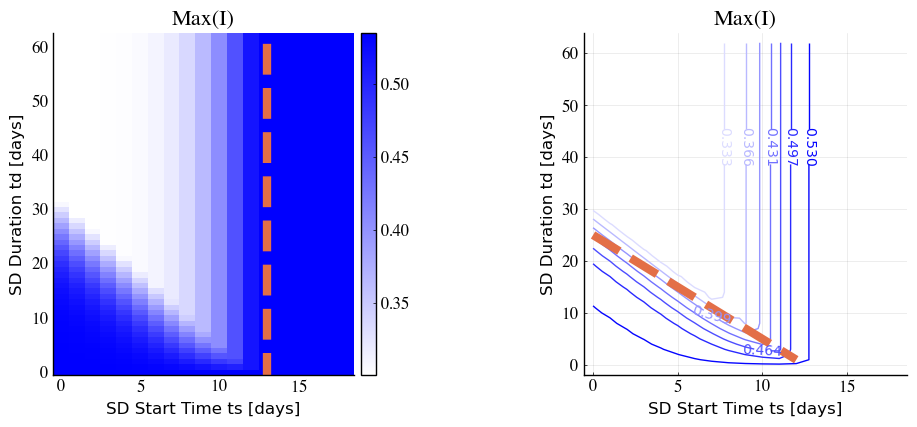

In [4]:
robustness(0.8)

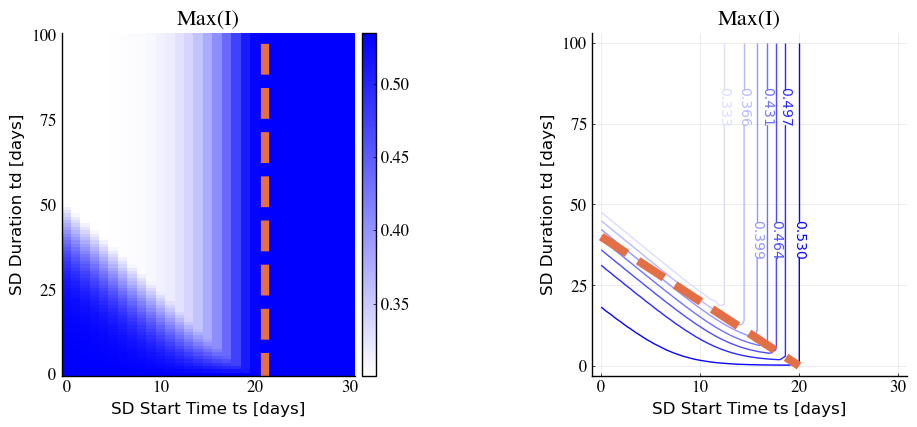

In [5]:
robustness(0.5)

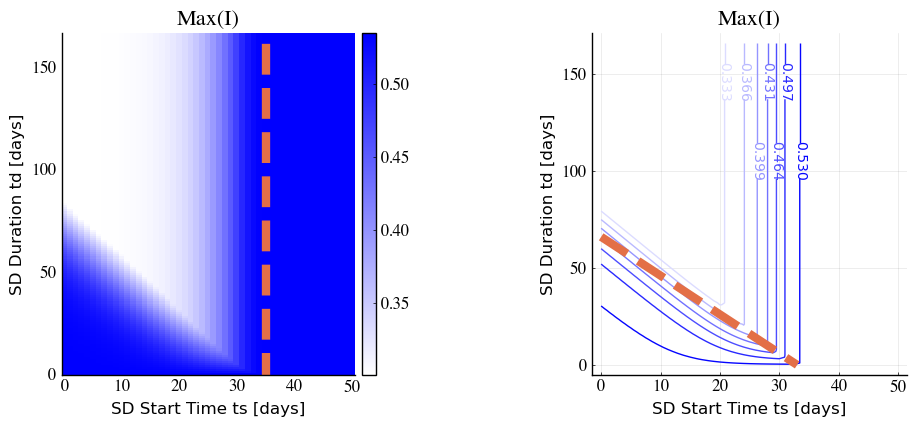

In [6]:
robustness(0.3)

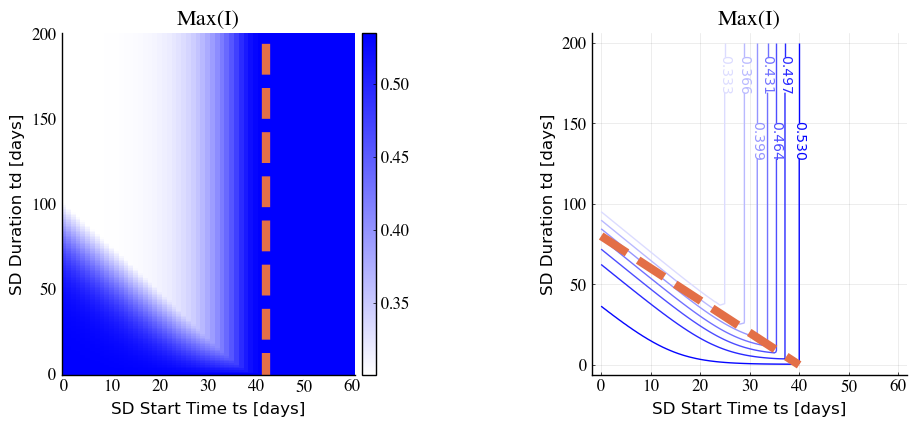

In [7]:
robustness(0.25)

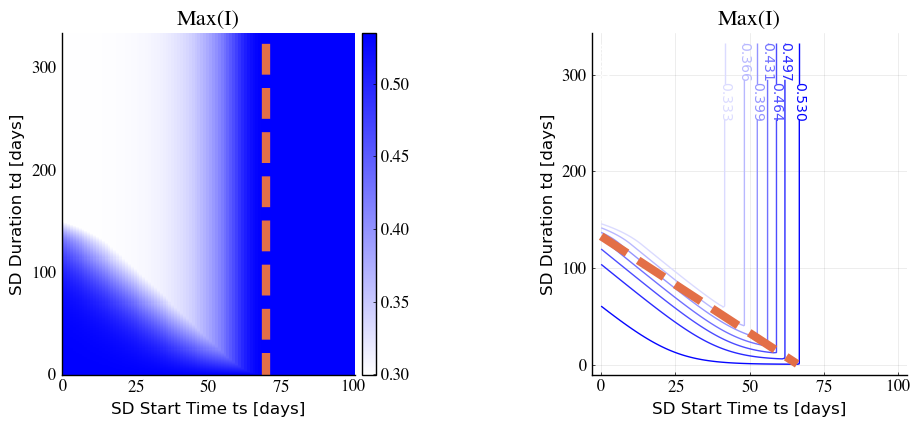

In [8]:
robustness(0.15)

# Adjourn

In [9]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/March/1 12:12"